# Assignment 8

Name 1: Sangeet Sagar<br/>
Student id 1: 7009050<br/>
Email 1: sasa00001@stud.uni-saarland.de<br/>


Name 2: Nikhil Paliwal<br/>
Student id 2: 7009915<br/>
Email 2: nipa00002@stud.uni-saarland.de<br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python files for exercise 1. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

## Exercise 1: Document Classification Warm-Up (4 points)

In this exercise you will explore the Reuters News corpus and apply basic feature selection techniques to it. You can download the reuters corpus and English stop words via [NLTK](https://www.nltk.org/):

In [2]:
!pip install nltk
import nltk
nltk.download('reuters')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /home/sangeet/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sangeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

It consists of articles from [Reuters](https://de.wikipedia.org/wiki/Reuters) mapped to one of 
Files and categories (classes) can be accessed easily. Although there is a train/test split, we will use the whole corpus for this exercise.

In [3]:
from nltk.corpus import reuters, stopwords
stop_words = stopwords.words('english')
print(reuters.categories())
print("# of categories: {}".format(len(reuters.categories())))
reuters.fileids()[:10]

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']
# of categories: 90


['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843']

Each document belongs to one or more categories. For the sake of simplicity we map each document to the first of its categories.

In [4]:
print(reuters.categories('test/14833'))
category = reuters.categories('test/14833')[0]
category

['palm-oil', 'veg-oil']


'palm-oil'

**1.1: Categories (1.5 points)**

1. Load data into the `Corpus` class. We suggest to give an attribute `documents` that contains a list of `Document` objects. Preprocessing steps (tokenization, lowercasing, stopword removal) should happen within the `Document` objects. As always, you can deviate from that if you find it more convenient. (1 point)
2. Implement the method `category_frequencies` in the `Corpus` class. It should calculate the absolute frequencies of each category in the whole corpus. (0.25 points)
3. Plot categories vs. their frequency on a log-log scale. Do so by implementing the function `plot_category_frequencies`. What can you say about the distribution the category frequencies you observe? (0.25 points)


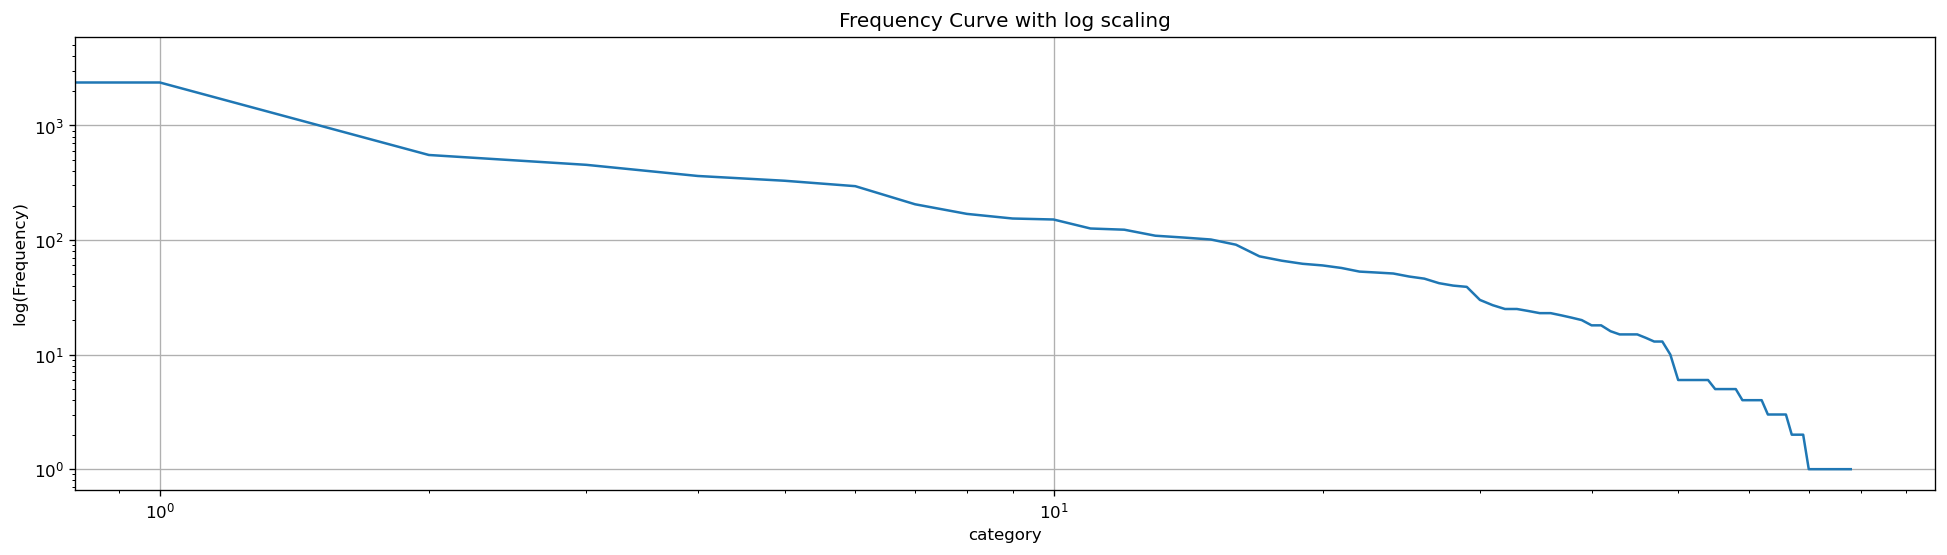

In [5]:
from importlib import reload
import exercise_1
exercise_1 = reload(exercise_1)

corpus = exercise_1.Corpus(
    documents=[exercise_1.Document(fileid, reuters.raw(fileid), reuters.categories(fileid), stop_words=stop_words) for fileid in reuters.fileids()],
    categories=reuters.categories()
)

exercise_1.plot_category_frequencies(corpus.category_frequencies())

**What can you say about the distribution the category frequencies you observe?** <br>
It follows power law distribution

**1.2 Document Frequency (1.5 points)**

A term's document frequency (DF) is given by:

\begin{equation}
DF_{c_k}(t_i) = 
\frac{
\text{# of documents in $C_k$ containing $t_i$}
}{
\text{# of documents of category $C_k$}
}
\end{equation}

1. Find the 10 most frequent terms of the `housing ` category. Do so by implementing the method `term_frequencies` in the `Corpus` class. (0.5 points)
2. For these 10 terms, calculate their DF in the `housing` category as well as in the whole corpus (over all categories). Do so by implementing the method`df` in the `corpus` class. Plot the results by implementing the function `plot_dfs`. (0.5 points)
3. Is DF a good predictor for a category? Explain in 2-3 sentences. (0.5 points)

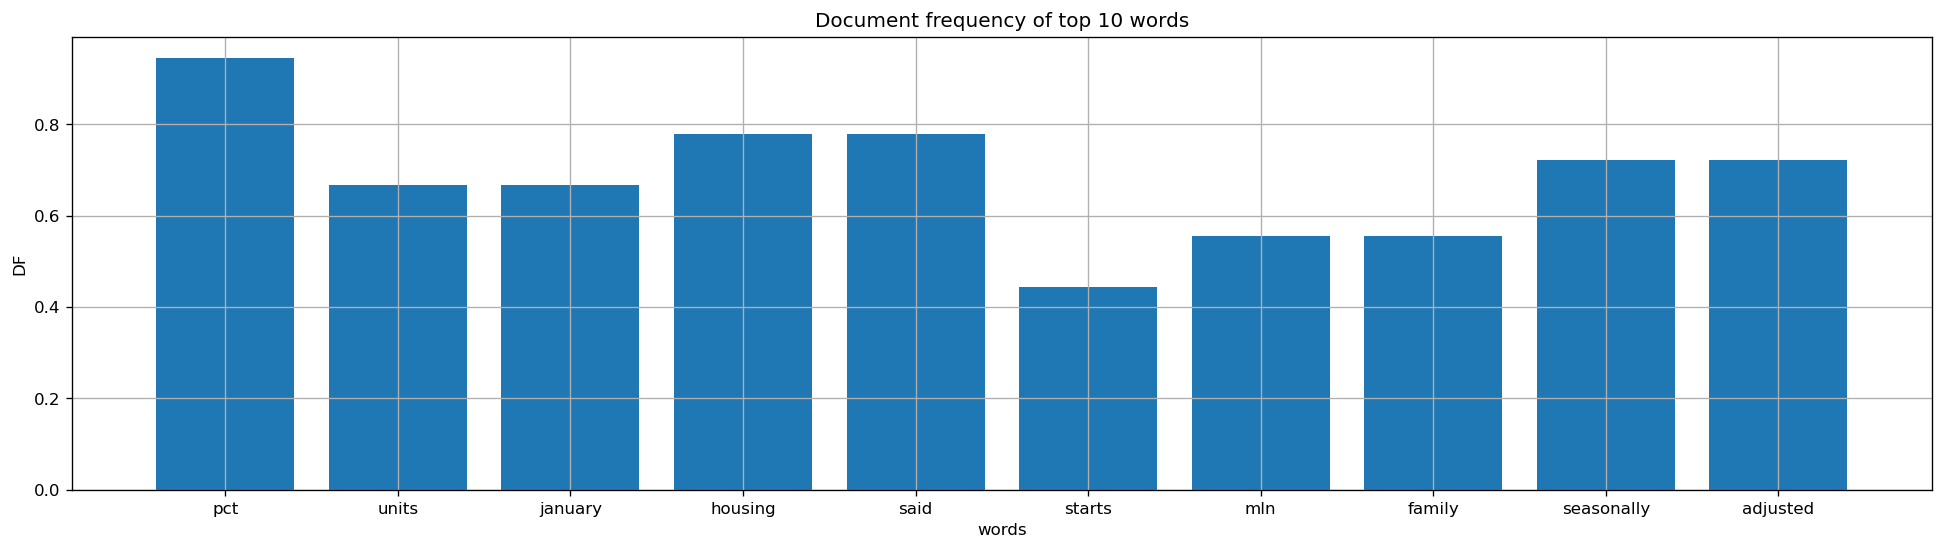

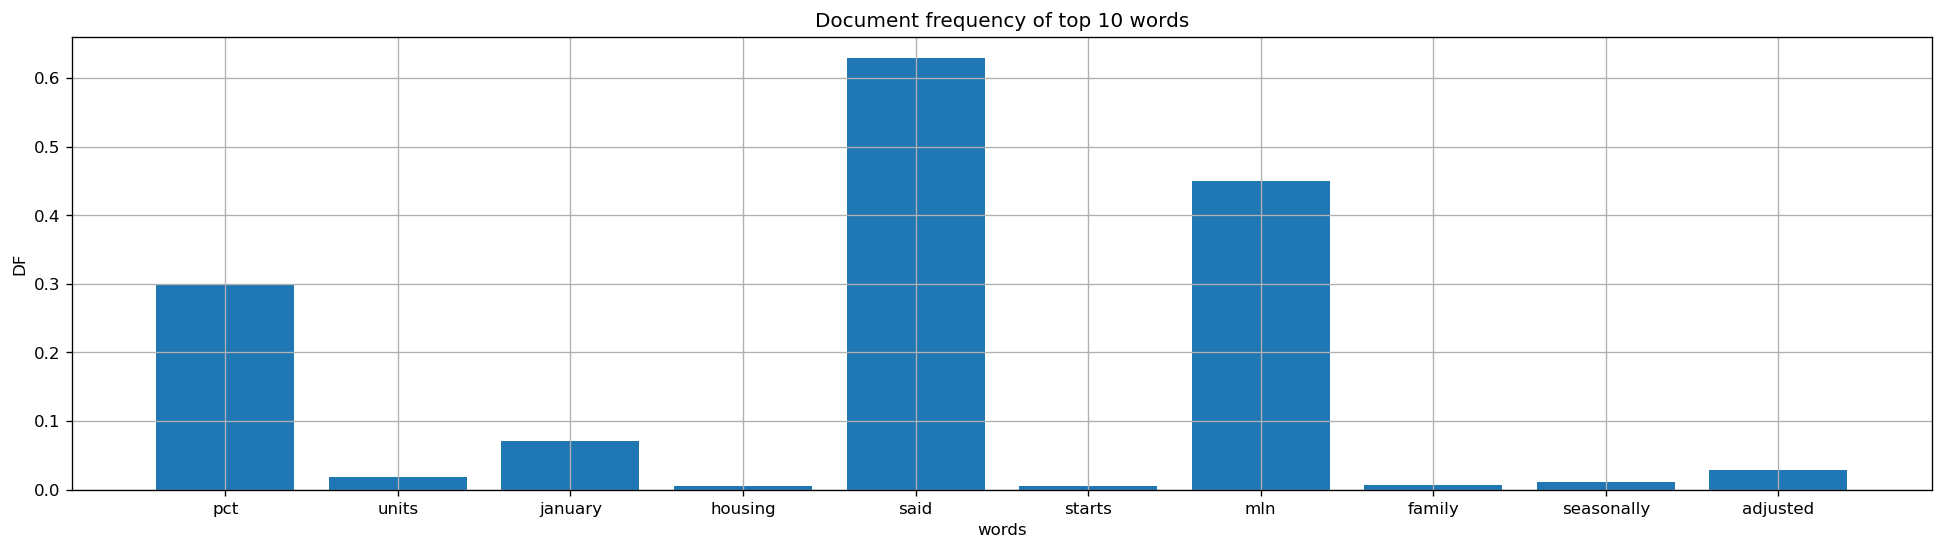

In [6]:
most_common_housing = corpus.term_frequencies('housing').most_common(10)
most_common_housing = [term for term, _ in most_common_housing]

dfs_housing = [corpus.df(term, category='housing') for term in most_common_housing]
dfs_all = [corpus.df(term) for term in most_common_housing]

exercise_1.plot_dfs(most_common_housing, dfs_housing)
exercise_1.plot_dfs(most_common_housing, dfs_all)

**Is DF a good predictor for a category?** <br>
No. The most suitable predictor would be tf-idf (term frequency-inverse document frequency). There are words like `january`, `min`, `said` which are although frequent occuring tokens in `housing` category but show no relevance with this class. A good predictor like tf-idf shows how important a word is to a document in a collection of documents. The tf-idf statistics helps prioritize tokens that overall depict the main theme of a sentence in a document. This also helps to diminish the weight of frequent tokens which are meaningless to the theme of a sentence like article, prepositions etc.

**1.3 Pointwise Mutual Information (1 point)**

PMI is given by:
\begin{equation}
PMI(x;y) = \log_2 \frac{p(x,y)}{p(x)p(y)}
\end{equation}

1. Give an interpretation of PMI. When will it be large, when will it be small? What are its upper and lower bound? (0.25 points)
2. Calculate PMI of the `housing` category and each of the 10 most frequent terms from that category. Do so by implementing the method `pmi` in the `Corpus` class. Plot the PMI values. Do so by implementing the function `plot_pmis`. (0.5 points)
3. What does the plot tell you about the suitability of the most frequent words of a category as a feature for text classification? Come up with an improved measure that makes use of both the document frequency and PMI (it need not be derived formally from PMI, but it should be motivated by your findings). (0.25 points)

**Answers** <br>
1. PMI is maximum when a word in a topic occurs quite often mutually than individually. PMI is smaller (or negative) when the word in that topic occurs tends to occur individually representing uninformative co-occurrences. <br>
$$
PMI(x;y) = \log \frac{p(x,y)}{p(x)p(y)} = \log \frac{p(x|y)}{p(x)} = \log \frac{p(y|x)}{p(y)}
$$
Upper Bound: $$\text{min}[\log \frac{1}{p(x)}, \log \frac{1}{p(y)}]$$ <br>
lower bound: $$-\infty$$

3.The plots show some good results e.g. words like `housing`, `starts`, `family` have a high PMI score implying they occur more often under the category `housing`, thus implying their strong association with this category. However, this is not true for some words like `said`, `min` which although are among the most frequent tokens in the `housing` category, but their association with the category is not strong and often occurs individually.

The problem with PMI is that it is weighted towards infrequent events. The modified improvisation would be:
$$
PMI(x;y) = \log \frac{p(x,y) \cdot N}{p(x)p(y)}
$$

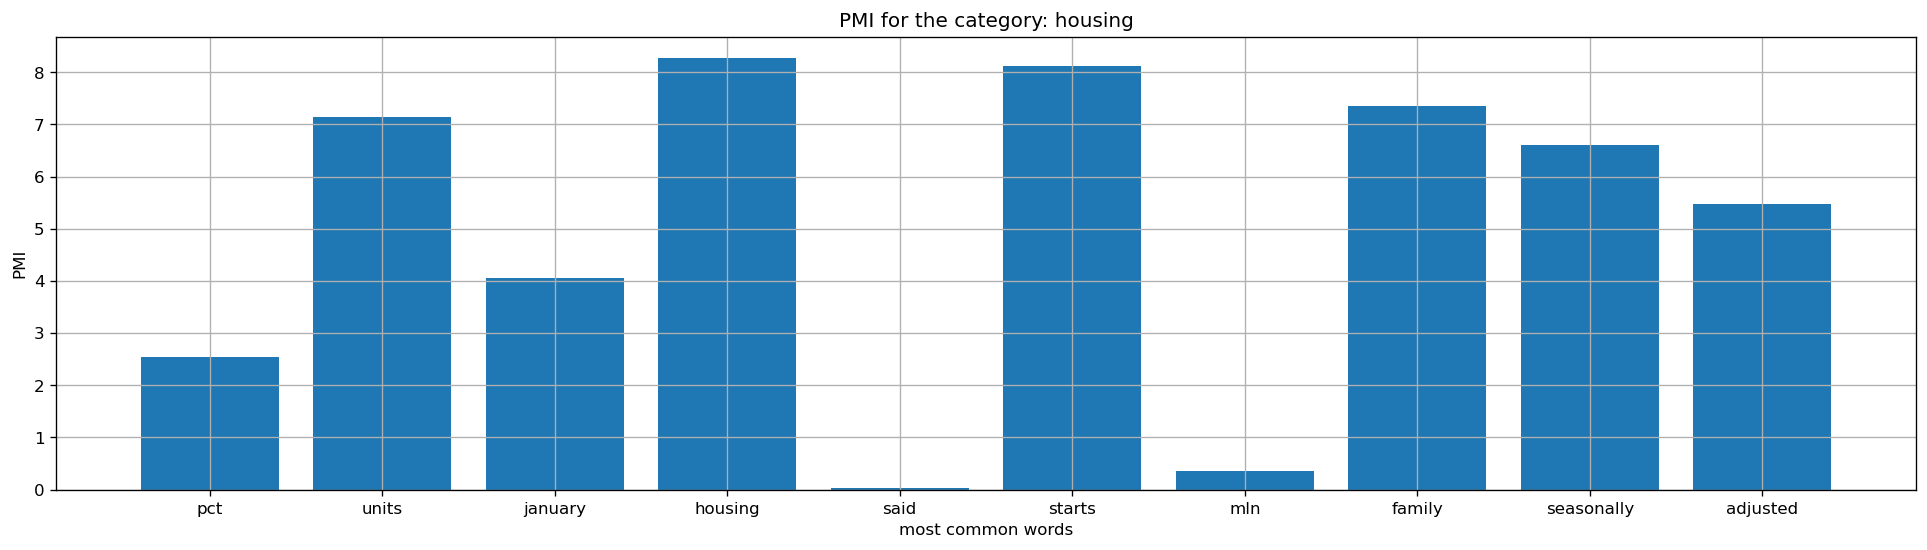

In [7]:
# pmis = [corpus.pmi('housing', term) for term in most_common_housing]
pmis = corpus.pmi('housing', most_common_housing)
exercise_1.plot_pmis('housing', most_common_housing, pmis)

## Exercise 2 $\chi^2$ (2p)

Study the usage of $\chi^2$ statistics online. A very brief overview with examples can be found on [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test).

**2.1 $\chi^2$ Introduction (1.25 points)**

1. How can you turn a numerical feature into a categorical one? What are the parameters of this decision? What are some features (at least 3) one may encounter in NLP? (0.25 points)

**Answers** <br>
One easy 
A numerical feature eg. $F_1$ can be turned into a categorical (or binary) feature as $(F_1, \text{not} F_1)$. So instead we now check if the feature is present or not.
Another example could be dividing the numerical feature values into some interval and then assign them to a category, in such case the length of interval would be the parameter of decision. 
For NLP, for task like Entity recognition in language like German, we can define binary categorical feature as presence/absence of capital letter for detection, which will be very useful.
Another, could be Document Frequency (categorized) and lastly for Author identification, if combination of particular grammatic techniques is there or not.

2. With the following knowledge of binary features, what's the expected count of $c(A \cap B), c(\neg A \cap B), c(A \cap \neg  B), c(\neg A \cap \neg B)$? \\
Total count $N = 100$, $c(A) = 35, c(B) = 61$. (0.25 points)

**Answers** <br>
\begin{align*}
c(A \cap B) &= c(A) \cdot c(B) &= 35\cdot61 = 2135 \\
c(\neg A \cap B) &= c(\neg A) \cdot c(B) &= (100-35)\cdot61 = 3965 \\
c(A \cap \neg B) &= c(A) \cdot c(B) &= 35\cdot(100-61) = 1365 \\
c(\neg A \cap \neg B) &= c(A) \cdot c(B) &= (100-35)\cdot(100-61) = 2535
\end{align*}

3. Using the given observations compute the $\chi^2$ statistics and the respective probability of the features $B$ and $C$. (0.5 points)

||A|$\neg$ A|
|-|-|-|
|B|6|55|
|{$\neg $B}|29|10|

||A|$\neg$ A|
|-|-|-|
|C|21|40|
|{$\neg$ C}|14|25|

**Answers** <br>
$A = \#(B, A) = 6$ <br>
$B = \#(\neg B,A) = 29$ <br>
$C = \#(B, \neg A) = 55$ <br>
$D = \#(\neg B, \neg A) = 10$ <br>
$N = A+B+C+D = 100$
\begin{align*}
\chi^2 &= \frac{N(AD - BC)^2}{(A+B)(A+C)(B+D)(C+D)} \\
\chi^2 &= \frac{100(6\cdot10 - 29\cdot55)^2}{(6+29)(6+55)(29+10)(55+10)} \\
\chi^2 &=  45.535\\
\end{align*}
$P(B) = \frac{6+55}{100}=0.61$

$A = \#(C, A) = 21$ <br>
$B = \#(\neg C,A) = 14$ <br>
$C = \#(C, \neg A) = 40$ <br>
$D = \#(\neg C, \neg A) = 25$ <br>
$N = A+B+C+D = 100$
\begin{align*}
\chi^2 &= \frac{100(21\cdot25 - 14\cdot40)^2}{(21+14)(21+40)(14+25)(40+25)} \\
\chi^2 &= 0.0226\\
\end{align*}
$P(C) = \frac{21+40}{100}=0.61$

4. Based on your research of $\chi^2$, what does the computed probability signify (in terms of hypotheses)? What is the hypothesis? Would you say that $B$ and $C$ are good features to decribe $A$? (0.25 points)

**Answers** <br>
The computed probability summarizes the difference between given data and our independence hypothesis. We assume a null hypothesis where class $A$ and features $B$ or $C$ are statistically independent. <br>
$\chi^2$ value of $B$ is significantly high so we believe that the variables are independent i.e. they are not linked together, hence $B$ is not a good feature to describe $A$. While $\chi^2$ value of $C$ is quite low ($< 0.05$) representing the strong dependence relation between $C$  and $A$ hence, $C$ can be used to describe A. 

**2.2 $\chi^2$ Feature selection (0.75 points)**

1. Given the set of categorical features $F$ and one specific target feature $f_0$, how can you use the $\chi^2$ statistics to select the most predictive feature? (0.25 points)
2. If you know all the features in $F$ are **not** pair-wise independent, how do you select $k$ features to describe $f_0$ together? (0.25 points)
3. If you know all the features in $F$ are pair-wise independent, how do you select $k$ features to describe $f_0$ together? (Try to be computationally efficient and therefore provide a different algorithm than for the previous question.) (0.25 points)

**Answers** <br>
1. We can calculate $\chi^2$ value between each feature in F with target feature $f_0$ and among themselves. The most predictive feature would be the one with the least $\chi^2$ value. <br>
2. Even if they are not pairwise independent, selection could be based on correlation between features. We want features which are least correlated or redundant. The first $k$ features with least $\chi^2$ value with $f_0$ would be selected. Here we will include only one feature of two which are not pair-wise independent. <br>
3. $\chi^2$ value will be zero for pair-wise independent terms, thus this computation can be omitted. We just select k features from $F$ with least $\chi^2$ with target $f_0$ directly unlike 2. 



## Exercise 3: Authorship Identification (4 points)

The science of *stylometry* assumes that authors have unconscious writing habits. Therefore, the words and grammar in a text become reliable indicators of the author of the text. Various research techniques have tried to do a feature-level analysis for the task of authorship identification/attribution. 

**3.1 (1 point)** 

In Chapter 6, you studied different types of classification. For the particular problem of authorship identification, suggest how you could formulate this task for each of the following categories (1 sentence each)

- Binary classification
- Multi-class classification
- Flat classification
- Hierarchical classification
- Single category classification
- Multi-category classification
- Clustering

**Answers**<br>
- Binary classification: Given a document predict if it was authored by the target author (here we assume that a document has a unique author) or not. 
- Multi-class classification: Given a document with multiple target authors, predict who authored it. One could use binary classification with one-vs-rest classification.
- Flat classification: Assume that the authors are mutually exclusvie or they share no similarlity in their writing pattern. The classifier would assign an author to a document based on a single decision.
- Hierarchical classification: In hierarchial classification the categories or the authors are organized into levels depending on their similarity in writing pattern. The classifier would then take multiple iterations to itertate from a parent node to reach down to a root node (the final category) who is the author of that document.
- Single category classification: If given a situation where a document is authored by only one author, the goal would be to predict the author of a document from a pool of authors.
- Multi-category classification: If given the situation where a document is authored by multiple authors, the goal would be to predict authors of a document from a pool of authors.
- Clustering: Given many document, the goal is to group or cluster documents that could have been authored by the same author.

**3.2 (2.5 points)**

Read this [paper](https://dl.acm.org/doi/pdf/10.3115/1220355.1220443) which does a feature study for authorship identification. Answer the following questions (1-3 sentences each):

1. What are the 6 categories of features extracted for the task? Explain in 1 sentence each. (0.5 points)
2. What does the author observe in comparison to the baseline? (0.5 points) 
3. The author suggests using [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)s as the classifier. What are the advantages offered by SVMs which guarantee a high accuracy in this problem? (0.5 point) 
4. The author concludes several possible scopes of improvement. Based on what you have studied so far, suggest if any improvements can be made in the given study w.r.t. (1 point)
  - Feature selection 
  - Usage of n-gram features
  - Any other approach other than the above two

**Answers**<br>
1. 
- Length features: compute average lengths of sentences
- Function word frequencies: function words carrying little lexical meaning like articles, pronouns, etc. are mapped to a single token (for each category) and the frequency of such tokens is taken into account instead.
- part of speech trigrams: compute the frequency of POS trigrams. E.g. given the trigram `ABC` and pos(`C`)=`NOUN`. Get the frequency of all such trigrams.
- syntactic productions: compute per document frequency of all productions.
- semantic information: binary semantic info (eg. number and person feature (eg. 1st person, 2nd person, etc), preverbal and postverbal locatives, etc.) + semantic modification relation (pos of all members in a semantic graph and semantic relation of all daughter nodes). We compute per document the frequency of all modification structures. 
- n-gram frequency features: compute frequency distribution of all ngrams in the corpus but with certain tweaks like- map all proper nouns to a unique token`NAME`.

2. In comparison to the baseline accuracy 45.5%, the authors observed that POS trigram frequencies performed exceptionally well than other features with accuracy ranging in 92%-94%. When all features are combined, the highest accuracy of 97.67% is achieved with a frequency threshold of 75.

3. SVMs are effective in high dimensional feature spaces similar to our problem where we have multiple feature spaces that are combined together to perform classification.

4. 
- We could prepare feature heatmaps to understand exactly what features contribute to the model's prediction. Features with the least contribution could be eliminated to avoid overfitting and gain training performance. We could also use $\chi^2$ test to select those features that have the strongest relationship with the output variable.
- One could try with a combination of POS bigrams and POS trigrams as the latter alone has been observed to outperform other features in terms of accuracy.
- Ensemble approach as discussed in the article is also a promising idea. Different classifiers could be trained for different features and further, an ensemble of all the classifiers could be taken to make the final prediction.

**3.3 (0.5 points)** 

State 3 real-life, contemporary applications where authorship identification/verification/attribution is useful. 

**Answers**<br>
- Cheating detection among students
- Musical authorship detection. Quite a number of musicians engage in copying others' work and present them as their own. Stylometry could be applied to such disputed work.
- Identify authors of historical manuscripts based on their writing pattern. It can also be applied to group manuscripts that have similar writing patterns and attribute them to a single author.
- In the field of forensics cases eg. detection of suicide notes.

## Bonus (1.5 points) 

Consider the two plots given below. 

* For Plot 1 and Plot 2, are any or both of the features 1 and 2 
1. redundant
2. useful
3. irrelevant

    for a task like clustering? Explain your choice from the above 3. (1 point)
    
![Plots](bonus_features.png "Plot 1 and 2")

**Answers** <br>
- for Plot 1 there seems a good relationship between feature 1 and feature 2, hence for clustering, both the features seem useful. But since there is direct correlation between values of feature 1 and feature 2 - both values are increasing monotonically together. Just one is enough. So there is just one useful and another is redundant. 
- for Plot 2, Feature 2 seems to be weakly linked with Feature 1 as it does not hold any relationship according to given plot. Feature 2 remains almost same as Feature 1 increases in value. Hence, feature 2 seems redundant and irrelevant. While feature 1 is useful.

* Draw/create a plot which shows features 1 and 2 as the remaining of the 3 choices stated above. Explain your reasoning in 1-2 sentences. (0.5 point)

**Answers** <br>

* In plot 1, both features are not correlated and have direct influence on data points to group them.
* In plot 2, irrespective of features all data points can be grouped into one single clusters thus all are irrelevant.

![Plots](other_plots.jpeg "Remaining cases")

